In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline
#import all potentially necessary libraries 

In [2]:
#open kc_house_data.csv and store in data variable
data = pd.read_csv('kc_house_data.csv')
data.head() #show first 5 rows.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [294]:
#check for missing datas
data.isnull().values.any()

True

In [295]:
data.isnull().sum()
#check for where the missing data is. According to the result, water front is missing 2376/21597 data points, view
#is missing 63/21597 and yr_renovated is missing 3842/21597.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [296]:
#this shows that waterfront is probably catergorical with values 0 and 1.
data.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [297]:
data.waterfront.unique()
#Confirms that water front is categorical.

array([nan,  0.,  1.])

In [298]:
#replace 
data.waterfront = data.waterfront.fillna(0)
data.waterfront.unique()

array([0., 1.])

In [299]:
data.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [300]:
data.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [301]:
#as we see here, it seems a lot of the data in year renovated in filled in with 0.0. even at 3rd quartile the number is still 0

data.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [302]:
data.yr_renovated.unique()
#this shows that the yr_renovated are filled w 0. This means that the house has never been renovated?

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [303]:
#count number of data points being filled 0.0. There are 17011 data points as this. 
#Let's assume that this means the houses weren't renovated or renovations aren't reporte
data['yr_renovated'].value_counts()[0.0].sum()

17011

In [304]:
#A lot of missing data points; therefore, I decided to drop the entire column as there are a lot of bad data. 
data = data.drop('yr_renovated', axis = 1)

In [306]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [305]:
data.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [311]:
#there are duplicates for ID --> houses were resold?
data.duplicated('id').value_counts()

False    21420
True       177
dtype: int64

In [313]:
#decided to drop ID column
data = data.drop('id', axis=1)

In [314]:
#identifying multicolinearity
abs(data.corr()) >0.8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


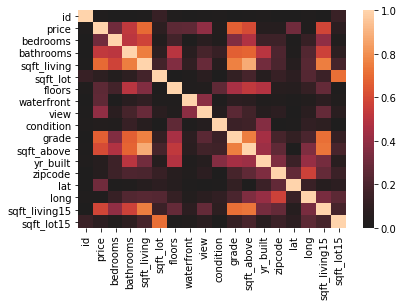

In [310]:
sns.heatmap(abs(data.corr()), center=0);

There seems to only be multicolinearity between sqft_above and sqft_living of |r| = 0.87
This makes sense as they are basically the same thing. Will run a few more things to to determine which column to drop.

In [315]:
abs(data.corr())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.395734,0.036056,0.667951,0.605368,0.053953,0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078523,0.026496,0.356563,0.479386,0.155670,0.154092,0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186451,0.126479,0.665838,0.686668,0.507173,0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.282532,0.059445,0.762779,0.876448,0.318152,0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075298,0.008830,0.114731,0.184139,0.052946,0.129586,0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028436,0.264075,0.458794,0.523989,0.489193,0.059541,0.049239,0.125943,0.280102,0.010722
waterfront,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.382000,0.016648,0.082818,0.071778,0.024487,0.028923,0.012157,0.037628,0.083823,0.030658
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.054564,0.085277,0.006141,0.077894,0.279561,0.073332
condition,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045735,1.000000,0.146896,0.158904,0.361592,0.002888,0.015102,0.105877,0.093072,0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249727,0.146896,1.000000,0.756073,0.447865,0.185771,0.113575,0.200341,0.713867,0.120981


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a345604e0>,
      dtype=object)

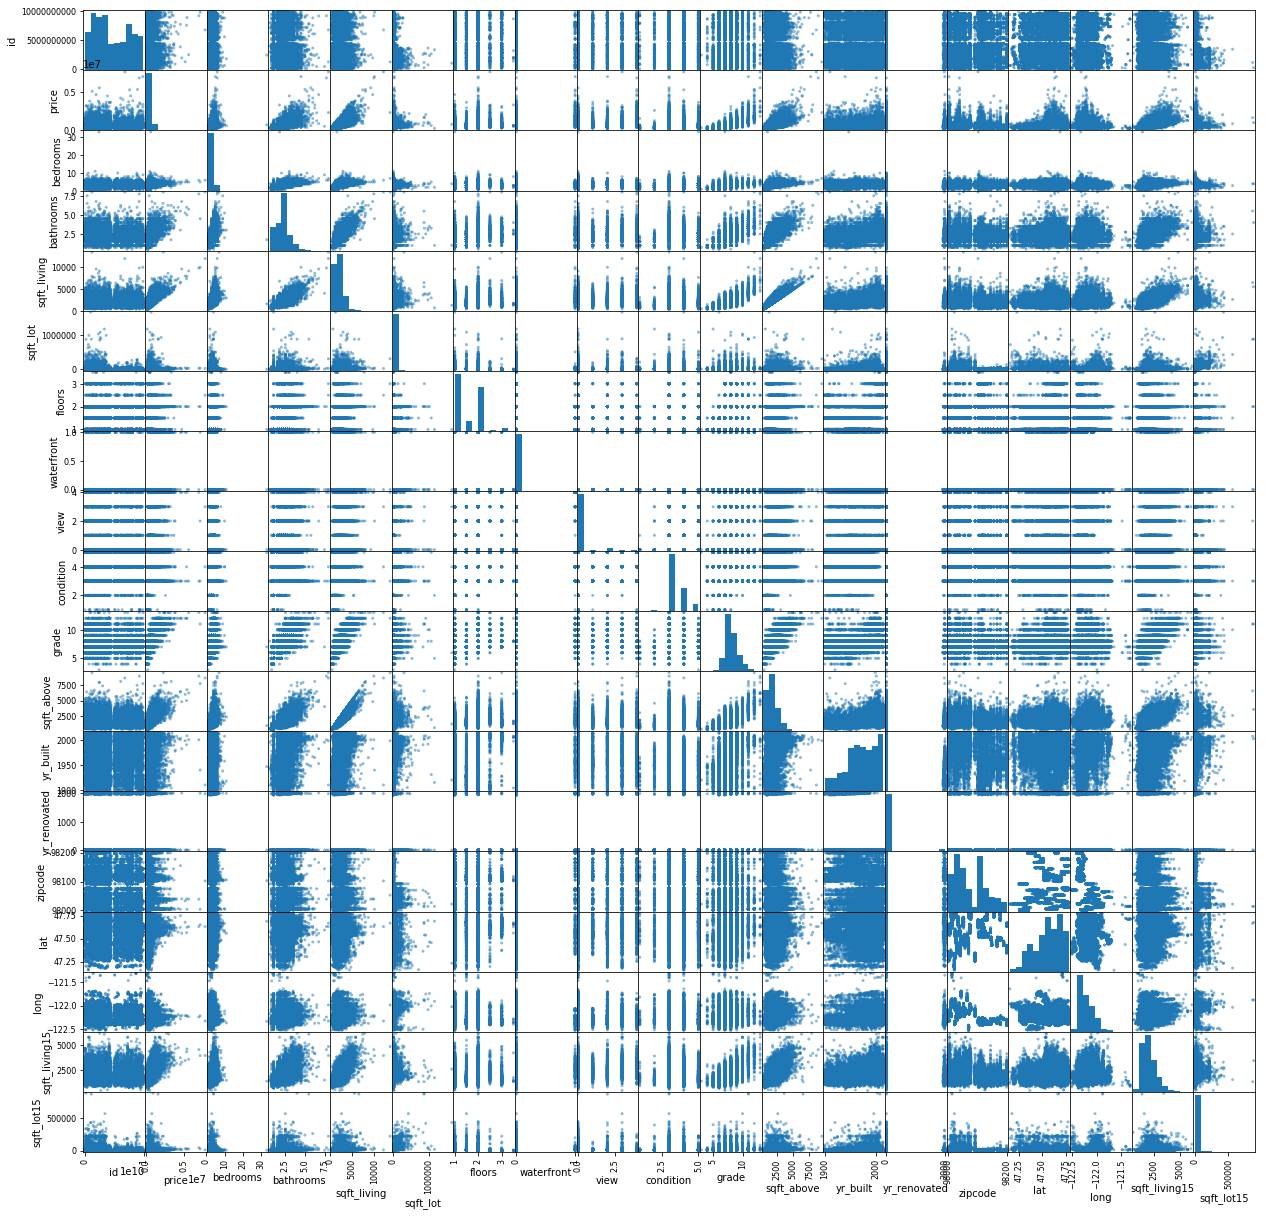

In [147]:
pd.plotting.scatter_matrix(data,figsize  = [21, 21])

In [ ]:
#the scatter matrix shows that floors, waterfront, view, condition, grade are all categorical/dummy variables. 

In [152]:
#don't really have much use for id, so I will drop it.
data  = data.drop('id', axis=1)

In [153]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [166]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [316]:
#Most intuitive way to think is that price would be correlated to sqft_living and sqft_lot.

In [321]:
f_sqft_above='price~sqft_above'
model_above=ols(formula = f_sqft_above, data=data).fit()
model_above.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

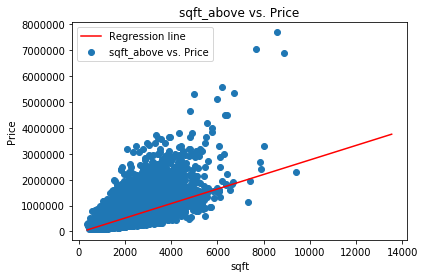

In [322]:
plt.scatter(data['sqft_above'], data['price'], label= 'sqft_above vs. Price')
plt.xlabel('sqft')
plt.ylabel('Price')
x_new_above = pd.DataFrame({'sqft_above':[data['sqft_above'].min(), data['sqft_above'].max()]})
predict_above = model_above.predict(x_new_above)
plt.plot(x_new, predict, color='red', label='Regression line')
plt.legend()
plt.title('sqft_above vs. Price')
plt.show()

In [ ]:
#Since sqft_above is clearly not a very good predictor of pricing in comparison to sqft_living.
#I'm dropping the sqft_above column

In [323]:
data = data.drop('sqft_above', axis = 1)

In [324]:
f='price~sqft_living'
model = ols(formula = f, data = data).fit()

In [325]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        21:31:33   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

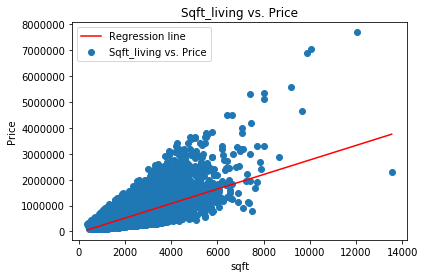

In [326]:
plt.scatter(data['sqft_living'], data['price'], label= 'Sqft_living vs. Price')
plt.xlabel('sqft')
plt.ylabel('Price')
x_new = pd.DataFrame({'sqft_living':[data['sqft_living'].min(), data['sqft_living'].max()]})
predict = model.predict(x_new)
plt.plot(x_new, predict, color='red', label='Regression line')
plt.legend()
plt.title('Sqft_living vs. Price')
plt.show()

In [327]:
data['sqft_lot'].isnull().any()

False

In [328]:
f1 = 'price~sqft_lot'
model1 = ols(formula = f1, data = data).fit()

In [329]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 06 May 2019   Prob (F-statistic):           5.57e-40
Time:                        21:31:40   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+05   2650.075    199.337      0.000    5.23e+05    5.33e+05
sqft_lot       0.7973      0.060     13.261      0.000       0.679       0.915
==============================================================================
Omnibus:                    19136.153   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147708.008
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      37.792   Cond. No.                     4.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

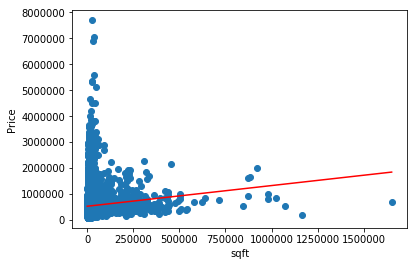

In [330]:
plt.scatter(data['sqft_lot'], data['price'], label= 'Sqft_lot vs. Price')
plt.xlabel('sqft')
plt.ylabel('Price')
x_new_1 = pd.DataFrame({'sqft_lot':[data['sqft_lot'].min(), data['sqft_lot'].max()]})
predict1 = model1.predict(x_new_1)
plt.plot(x_new_1, predict1, color='red', label='Regression line')

In [331]:
#seems like lot has nothing to do with price --> drop
data= data.drop('sqft_lot', axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,3,6,0.0,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,5,7,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,3,8,0.0,1987,98074,47.6168,-122.045,1800,7503


In [332]:
data=data.drop(['long','lat'], axis = 1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,0.0,3,7,0.0,1955,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,3,7,400.0,1951,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,3,6,0.0,1933,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,5,7,910.0,1965,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,3,8,0.0,1987,98074,1800,7503


In [6]:
condition = data.groupby(['zipcode','condition'])['price'].mean()



In [7]:
print(condition)

zipcode  condition
98001    2            3.560700e+05
         3            2.927207e+05
         4            2.539196e+05
         5            2.425433e+05
98002    3            2.588868e+05
         4            2.192858e+05
         5            2.216411e+05
98003    2            2.355000e+05
         3            2.992801e+05
         4            2.809591e+05
         5            3.706800e+05
98004    1            1.500000e+06
         2            4.250000e+05
         3            1.527265e+06
         4            1.145915e+06
         5            1.236365e+06
98005    2            5.777500e+05
         3            8.668012e+05
         4            7.669397e+05
         5            8.319500e+05
98006    1            3.725000e+05
         2            5.475000e+05
         3            9.958768e+05
         4            7.297227e+05
         5            8.064050e+05
98007    3            6.338542e+05
         4            5.948187e+05
         5            6.974750e+05
9

In [8]:
condition = condition.unstack()

In [12]:
condition

condition,1,2,3,4,5
zipcode,,,,,
98001,NaN,3.560700e+05,2.927207e+05,2.539196e+05,2.425433e+05
98002,NaN,NaN,2.588868e+05,2.192858e+05,2.216411e+05
98003,NaN,2.355000e+05,2.992801e+05,2.809591e+05,3.706800e+05
98004,1.500000e+06,4.250000e+05,1.527265e+06,1.145915e+06,1.236365e+06
98005,NaN,5.777500e+05,8.668012e+05,7.669397e+05,8.319500e+05
98006,3.725000e+05,5.475000e+05,9.958768e+05,7.297227e+05,8.064050e+05
98007,NaN,NaN,6.338542e+05,5.948187e+05,6.974750e+05
98008,NaN,NaN,6.937725e+05,5.888774e+05,7.319962e+05
98010,NaN,NaN,4.886843e+05,3.429075e+05,3.195643e+05


In [13]:
condition.columns

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='condition')

No handles with labels found to put in legend.


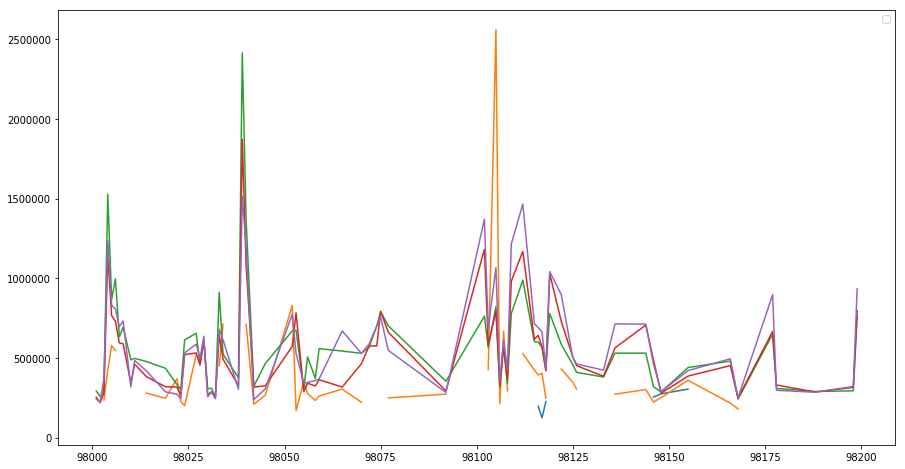

In [252]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [363]:
zip_dummies=pd.get_dummies(data['zipcode'])
zip_dummies

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


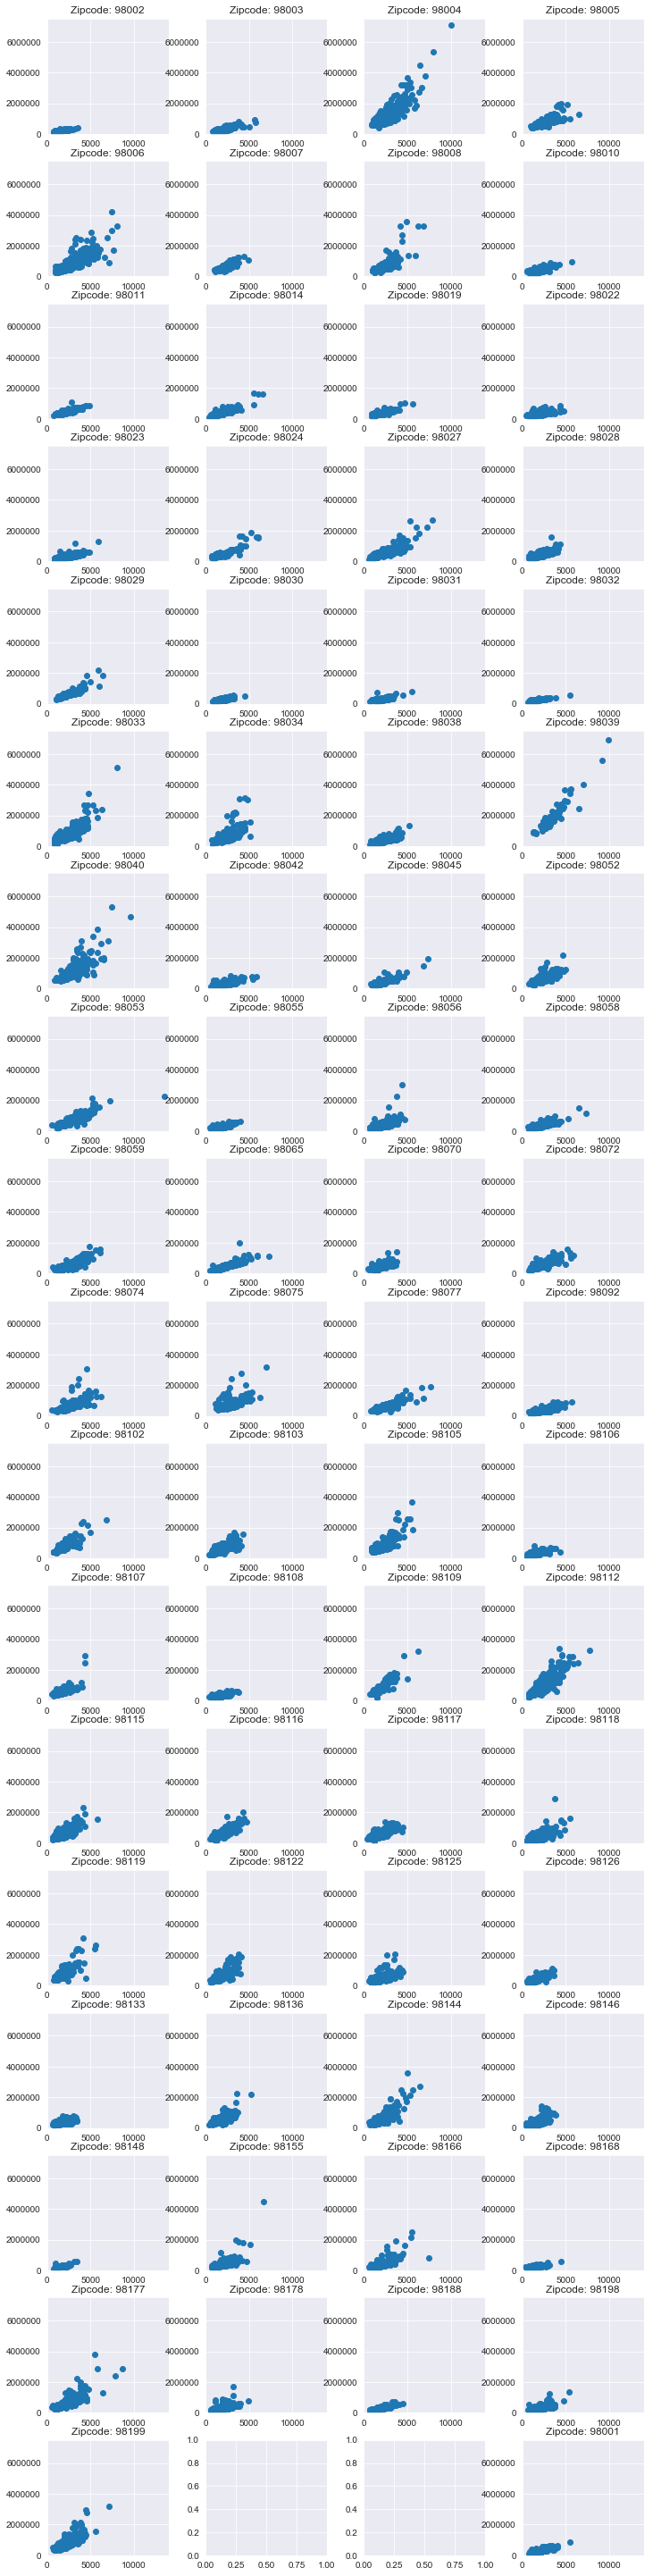

In [366]:
fig, axes = plt.subplots(figsize=(10,40),nrows = 18, ncols=4)
fig.tight_layout()
for x in range(0,len(zip_dummies.columns)):
    row = (x-1)//4
    column = x%4 - 1
    ax = axes[row][column]
    ax.scatter(data[data['zipcode']==zip_dummies.columns[x]]['sqft_living'],data[data['zipcode']==zip_dummies.columns[x]]['price'])
    ax.set_xlim(0,14000)
    ax.set_ylim(0,7500000)
    ax.set_title('Zipcode: '+str(zip_dummies.columns[x]))
plt.show()